<div style="background:#222222; color:#ffffff; padding:20px">
    <h2 align="center">Deep Learning Fundamentals</h2>
    <h2 align="center" style="color:#01ff84">Multiclass Clasification: MNIST</h2>
<div>

## Imports

In [1]:
# importing modules
import torch as T
import torch.nn as nn 
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms 

import matplotlib.pyplot as plt
import numpy as np
import time

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Auxliary plotting function

In [2]:
# https://discuss.pytorch.org/t/view-classify-in-module-helper/30279/6

def view_classify(img, ps):

    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

# Load MNIST Dataset
First up, we need to get our dataset. This is provided through the `torchvision` package. The code below will download the MNIST dataset, then create training and test datasets for us. Don't worry too much about the details here, you'll learn more about this later.

In [3]:
# Define a transform to normalize the data (Preprocessing)
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5), (0.5)) ])

# Download and load the training data
trainset    = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = T.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset    = datasets.MNIST('MNIST_data/', download=True, train=False, transform=transform)
testloader = T.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [4]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

Now our network is brilliant. It can accurately predict the digits in our images.

<div style="background:#222222; color:#ffffff; padding:20px">
    <h2 align="center" style="color:#01ff84">MNIST Clasification: Exercise</h2>
<div>

<div style="background:#222222; color:#ffffff; padding:20px">
  <h3 style="color:#01ff84; margin-top:4px">Exercise 2:</h3>
  <p>Train your network implementing the Pytorch training loop and <strong style="color:#01ff84">after each epoch, use the model for predicting the test (validation) MNIST data.</strong></p>
  <p>Note: If your model does not fit with the final softmax layer, you can remove this layer.</p>
  <p>Hint: <a href="https://discuss.pytorch.org/t/training-loop-checking-validation-accuracy/78399">Training loop checking validation accuracy
</a></p>
  <p>Research about <code>model.train()</code>, <code>model.eval()</code> and <code>with torch.no_grad()</code> in Pytorch.
<div>

In [5]:
# ## TODO: Your network here
# input_sz = 784
# hidden_sz = [400, 200, 100]
# output_sz = 10

# # Building a feed-forward network

# model = nn.Sequential(nn.Linear(input_sz, hidden_sz[0]),
#                       nn.ReLU(),
#                       nn.Linear(hidden_sz[0], hidden_sz[1]),
#                       nn.ReLU(),
#                       nn.Linear(hidden_sz[1], hidden_sz[2]),
#                       nn.ReLU(),
#                       nn.Linear(hidden_sz[2], output_sz))
#                       #nn.Softmax(dim=1))

# print(model)

In [6]:
class Classifier(nn.Module):
    # Deining layers
    def __init__(self):
        super().__init__()
        self.input_layer = nn.Linear(784,600)
        self.hidden1 = nn.Linear(600,400)
        self.hidden2 = nn.Linear(400,200)
        self.hidden3 = nn.Linear(200,100)
        self.output_layer = nn.Linear(100,10)

    # forward pass through the network
    def forward(self, x):
        first_layer = self.input_layer(x)
        act1 = F.relu(first_layer)
        second_layer = self.hidden1(act1)
        act2 = F.relu(second_layer)
        third_layer = self.hidden2(act2)
        act3 = F.relu(third_layer)
        fourth_layer = self.hidden3(act3)
        act4 = F.relu(fourth_layer)
        out_layer = self.output_layer(act4)
        #x = F.softmax(out_layer, dim=1)
        return out_layer

model = Classifier()
model

Classifier(
  (input_layer): Linear(in_features=784, out_features=600, bias=True)
  (hidden1): Linear(in_features=600, out_features=400, bias=True)
  (hidden2): Linear(in_features=400, out_features=200, bias=True)
  (hidden3): Linear(in_features=200, out_features=100, bias=True)
  (output_layer): Linear(in_features=100, out_features=10, bias=True)
)

In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)
epochs = 3
print_every = 40

for epoch in range(epochs):
    running_loss = 0
    print(f"Epoch: {epoch+1}/{epochs}")

    for i, (images, labels) in enumerate(iter(trainloader)):

        images.resize_(images.size()[0],784)

        ### Step-1 in training loop - reset the gradients
        optimizer.zero_grad()

        logits = model.forward(images) ### step-2 forward pass
       

        pred = F.log_softmax(logits, dim=1)
        loss = criterion(pred, labels) ### step-3 Compute loss

        loss.backward()              ### step-4 Backward pass
        optimizer.step()                ### step-5 update the model

        running_loss += loss.item()

        if i%print_every ==0:
            print(f"\tIteration: {i}\t Loss: {running_loss/print_every:.4f}")
            running_loss=0

Epoch: 1/3
	Iteration: 0	 Loss: 0.0574
	Iteration: 40	 Loss: 2.3016
	Iteration: 80	 Loss: 2.3011
	Iteration: 120	 Loss: 2.2997
	Iteration: 160	 Loss: 2.3006
	Iteration: 200	 Loss: 2.2981
	Iteration: 240	 Loss: 2.2967
	Iteration: 280	 Loss: 2.2970
	Iteration: 320	 Loss: 2.2959
	Iteration: 360	 Loss: 2.2947
	Iteration: 400	 Loss: 2.2930
	Iteration: 440	 Loss: 2.2929
	Iteration: 480	 Loss: 2.2894
	Iteration: 520	 Loss: 2.2879
	Iteration: 560	 Loss: 2.2850
	Iteration: 600	 Loss: 2.2850
	Iteration: 640	 Loss: 2.2852
	Iteration: 680	 Loss: 2.2838
	Iteration: 720	 Loss: 2.2803
	Iteration: 760	 Loss: 2.2775
	Iteration: 800	 Loss: 2.2781
	Iteration: 840	 Loss: 2.2766
	Iteration: 880	 Loss: 2.2759
	Iteration: 920	 Loss: 2.2726
Epoch: 2/3
	Iteration: 0	 Loss: 0.0568
	Iteration: 40	 Loss: 2.2693
	Iteration: 80	 Loss: 2.2659
	Iteration: 120	 Loss: 2.2621
	Iteration: 160	 Loss: 2.2594
	Iteration: 200	 Loss: 2.2572
	Iteration: 240	 Loss: 2.2570
	Iteration: 280	 Loss: 2.2514
	Iteration: 320	 Loss: 2.2

In [8]:
def view_classify(img, ps):

    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

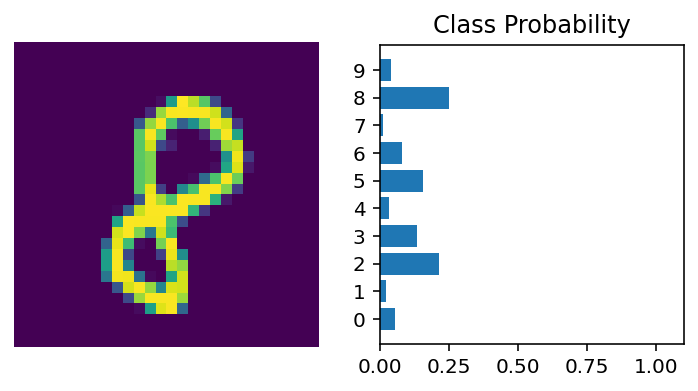

In [9]:
### Step-7 testing the model
images, labels = next(iter(testloader))

img = images[9].view(1,784)
# Turn off gradients to speed up this part
with T.no_grad():
    logits = model.forward(img)

# Output of the network are logits, need to take softmax for probabilities
ps = F.softmax(logits, dim=1)
view_classify(img.view(1, 28, 28), ps)

<div style="background:#222222; color:#ffffff; padding:20px">
  <h3 style="color:#01ff84; margin-top:4px">Exercise 3:</h3>
  <p>Write the code for adding <strong style="color:#01ff84">Early Stopping with patience = 2</strong> to the training loop from scratch.</p>
  <p><strong style="color:#01ff84">Hint:</strong> Monitor the Validation loss every epoch, and if in 2 epochs, the validation loss does not improve, stop the training loop with <code>break</code>.</p>
<div>

In [11]:
## TODO: Your training loop here